<a href="https://colab.research.google.com/github/Pelizzoli/NLP/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from nltk.corpus import wordnet as wn

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Get Stop words

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/NLP Data Sets/train.csv')
dev = pd.read_csv('/content/drive/MyDrive/NLP Data Sets/dev.csv')
dev

,tweet_id,text,airline_sentiment
0,5.681070e+17,@southwestair Great job celebrating #MardiGras...,positive
1,5.682160e+17,@southwestair thanks for taking it up a notch!...,positive
2,5.678420e+17,@USAirways Being put back on hold for what has...,negative
3,5.688350e+17,@united Thank you for your offer! All sorted o...,positive
4,5.695910e+17,@JetBlue wondering if it's possible for my col...,neutral
...,...,...,...
1313,5.700610e+17,"@AmericanAir ""sorry you were disappointed"" #ou...",negative
1314,5.701010e+17,@AmericanAir were stuck on a plane in Dallas t...,negative
1315,5.685730e+17,@united Lost my wallet on flight 1007 yesterda...,negative
1316,5.677480e+17,@USAirways Travelling from pwm to atl on Sunda...,negative


In [ ]:
x_dev = dev['text']
y_dev = dev['airline_sentiment']
x_train = train['text']
y_train = train['airline_sentiment']
x_dev

0       @southwestair Great job celebrating #MardiGras...
1       @southwestair thanks for taking it up a notch!...
2       @USAirways Being put back on hold for what has...
3       @united Thank you for your offer! All sorted o...
4       @JetBlue wondering if it's possible for my col...
                              ...                        
1313    @AmericanAir "sorry you were disappointed" #ou...
1314    @AmericanAir were stuck on a plane in Dallas t...
1315    @united Lost my wallet on flight 1007 yesterda...
1316    @USAirways Travelling from pwm to atl on Sunda...
1317                           @SouthwestAir thank you :)
Name: text, Length: 1318, dtype: object

In [ ]:
dev['airline_sentiment'].value_counts()

negative    826
neutral     279
positive    213
Name: airline_sentiment, dtype: int64

In [ ]:
target_names = ['negative', 'neutral', 'positive']

In [ ]:
dev['text']

0       @southwestair Great job celebrating #MardiGras...
1       @southwestair thanks for taking it up a notch!...
2       @USAirways Being put back on hold for what has...
3       @united Thank you for your offer! All sorted o...
4       @JetBlue wondering if it's possible for my col...
                              ...                        
1313    @AmericanAir "sorry you were disappointed" #ou...
1314    @AmericanAir were stuck on a plane in Dallas t...
1315    @united Lost my wallet on flight 1007 yesterda...
1316    @USAirways Travelling from pwm to atl on Sunda...
1317                           @SouthwestAir thank you :)
Name: text, Length: 1318, dtype: object

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=200)
text_ds = tf.data.Dataset.from_tensor_slices(x_train).batch(128)
vectorizer.adapt(text_ds)

In [ ]:
vocabulary = vectorizer.get_vocabulary()[:5]
vocabulary

['', '[UNK]', 'to', 'the', 'i']

In [ ]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))
word_index

{'': 0,
 '[UNK]': 1,
 'to': 2,
 'the': 3,
 'i': 4,
 'a': 5,
 'united': 6,
 'you': 7,
 'for': 8,
 'flight': 9,
 'on': 10,
 'and': 11,
 'my': 12,
 'usairways': 13,
 'americanair': 14,
 'is': 15,
 'in': 16,
 'southwestair': 17,
 'jetblue': 18,
 'of': 19,
 'me': 20,
 'it': 21,
 'your': 22,
 'have': 23,
 'was': 24,
 'not': 25,
 'with': 26,
 'at': 27,
 'that': 28,
 'no': 29,
 'this': 30,
 'get': 31,
 'but': 32,
 'from': 33,
 'be': 34,
 'are': 35,
 'can': 36,
 'we': 37,
 'now': 38,
 'thanks': 39,
 'cancelled': 40,
 'an': 41,
 'service': 42,
 'just': 43,
 'do': 44,
 'so': 45,
 'been': 46,
 'help': 47,
 'will': 48,
 'time': 49,
 'customer': 50,
 'im': 51,
 'up': 52,
 'our': 53,
 'out': 54,
 'they': 55,
 'us': 56,
 'what': 57,
 'hours': 58,
 '2': 59,
 'when': 60,
 'amp': 61,
 'flights': 62,
 'plane': 63,
 'its': 64,
 'hold': 65,
 'all': 66,
 'if': 67,
 'how': 68,
 'why': 69,
 'thank': 70,
 'cant': 71,
 'still': 72,
 'please': 73,
 'there': 74,
 'one': 75,
 'would': 76,
 'need': 77,
 'delayed': 7

Converting dataframe to string

In [ ]:
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')

# tokenize: search: nltk tokenize 
example = x_dev[5]

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

example_tokenize = word_tokenize(example) 
print("-------------------------tokenize:")
print(example_tokenize)

# stemmer: search: nltk stemmer  
stemmer = nltk.stem.PorterStemmer()
example_stem = stemmer.stem(example)
print("-------------------------stem:")
print(example_stem)

lemma = nltk.stem.WordNetLemmatizer()
example_lemm = lemma.lemmatize(example)
print("-------------------------lemm:")
print(example_lemm)

# tf-idf: search: scikit learn tf-idf https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
# search scikit learn CountVectorizer example: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# print("-------------------------CV:") 
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform([example])
# print(vectorizer.get_feature_names())

# print("-------------------------tfidf:")
# pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)), ('tfid', TfidfTransformer())]).fit([example])
# print(pipe['count'].transform([example]).toarray())
# print()
# print(pipe['tfid'].idf_)

vect = TfidfVectorizer()
tfidf_matrix = vect.fit_transform([example])
df = pd.DataFrame(tfidf_matrix.toarray(), columns = vect.get_feature_names())
print(df)

# pos_taging: search: nltk pos tagging example
example_posTag=nltk.pos_tag(example_tokenize)
print("-------------------------pos_taging:")
print(example_posTag)

# consituency parsing, chunking
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(example_posTag)
print(result)

-------------------------tokenize:
['@', 'united', 'common', '!', '!', 'keep', 'your', 'paper', 'work', 'ready', 'and', 'do', "n't", 'delay', 'our', 'flights', '(', '#', '1585', ')', 'and', 'meetings', '@', 'ChooseChicago']
-------------------------stem:
@united common!! keep your paper work ready and don't delay our flights(#1585)and meetings @choosechicago
-------------------------lemm:
@united common!! keep your paper work ready and don't delay our flights(#1585)and meetings @ChooseChicago
       1585       and  choosechicago  ...    united      work      your
0  0.235702  0.471405       0.235702  ...  0.235702  0.235702  0.235702

[1 rows x 15 columns]
-------------------------pos_taging:
[('@', 'NN'), ('united', 'JJ'), ('common', 'JJ'), ('!', '.'), ('!', '.'), ('keep', 'VB'), ('your', 'PRP$'), ('paper', 'NN'), ('work', 'NN'), ('ready', 'JJ'), ('and', 'CC'), ('do', 'VBP'), ("n't", 'RB'), ('delay', 'VB'), ('our', 'PRP$'), ('flights', 'NNS'), ('(', '('), ('#', '#'), ('1585', 'CD'), (

In [ ]:
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from tqdm import tqdm
from nltk.corpus import stopwords
stopwordEn = stopwords.words('english')
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

def lemmaWord(word):
    lemma = nltk.stem.WordNetLemmatizer() #wordnet.morphy(word)
    if lemma is not None:
        return lemma
    else:
        return word

def stemWord(word):
    stem = stemmer.stem(word)
    if stem is not None:
        return stem
    else:
        return word

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# **Morphology Processing**

Preprocessing stage

In [ ]:
def processTextMorph(text, lemma=True, gram=1, rmStop=True): 
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|', '', text, flags=re.MULTILINE) 
    tokens = word_tokenize(text)
    whitelist = ["n't", "not", "no"]  
    new_tokens = []
    stoplist = stopwordEn if rmStop else []
    for i in tokens:
        i = i.lower()
        if i.isalpha() and (i not in stoplist or i in whitelist):
            if lemma: i = lemmaWord(i)
            new_tokens.append(i)
    del tokens
    return new_tokens

In [ ]:
print(x_dev[5])
print(processTextMorph(x_dev[5]))

@united common!! keep your paper work ready and don't delay our flights(#1585)and meetings @ChooseChicago


TypeError: ignored

# Create a pipeline

In [ ]:
# Level: Morphology, model: tf-idf
text_clf_Morph = Pipeline([
    # add your code about text processing           
    ('vect', CountVectorizer(analyzer=processTextMorph)), 
    # ('tfidf', TfidfTransformer(use_idf=True)),

    # change your classifier here, search: sklearn logistic regression example  
    ('clf', LogisticRegression()) 
])

Train model

In [ ]:
text_clf_Morph.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer=<function processTextMorph at 0x7f4bfdd0ab00>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', 

Make predictions

In [ ]:
predicted_morph = text_clf_Morph.predict(x_dev)
predicted_morph

array(['positive', 'positive', 'negative', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [ ]:
from sklearn import metrics
morphologyAccuracy = metrics.accuracy_score(y_dev, predicted_morph)
morphologyPercision = metrics.precision_score(y_dev, predicted_morph, average = None)
morphologyRecall = metrics.recall_score(y_dev, predicted_morph, average = None)
morphologyf1 = metrics.f1_score(y_dev, predicted_morph, average = None)
print("Accuracy:", morphologyAccuracy)

print(metrics.classification_report(y_dev, predicted_morph, target_names=target_names))

# confusion class
pd.DataFrame(metrics.confusion_matrix(y_dev, predicted_morph), columns=target_names, index=target_names)

Accuracy: 0.7814871016691958
              precision    recall  f1-score   support

    negative       0.83      0.89      0.86       826
     neutral       0.61      0.56      0.59       279
    positive       0.76      0.66      0.71       213

    accuracy                           0.78      1318
   macro avg       0.74      0.70      0.72      1318
weighted avg       0.78      0.78      0.78      1318



,negative,neutral,positive
negative,732,70,24
neutral,102,157,20
positive,43,29,141


In [ ]:
df_pred_morph = pd.DataFrame({'news':x_dev, 'prediction':predicted_morph, 'true':y_dev})
df_pred_morph[df_pred_morph['true'] != df_pred_morph['prediction']]

,news,prediction,true
7,"@JetBlue, flights 1970, 1366, and 1552 will fl...",negative,neutral
12,"@USAirways, I know you're dealing with the wea...",neutral,negative
19,@SouthwestAir Why doesn't mean TSA PreCheck sh...,neutral,negative
27,@AmericanAir I was happy to purchase the upgra...,positive,negative
31,@JetBlue be flying soon to NYC on your airline...,negative,positive
...,...,...,...
1301,@JetBlue will I be compensated for delays or C...,negative,neutral
1302,@usairways Thank you for allowing me to spend...,positive,negative
1303,@united there is a sector whereby it says $0 i...,negative,neutral
1307,@JetBlue have a cpap machine for sleep apnea. ...,negative,neutral


# **Lexicon Processing**

In [ ]:
def processTextLexi(text, lemma=False, gram=1, rmStop=True): # default remove stop words
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|#', '', text, flags=re.MULTILINE)
    tokens = word_tokenize(text)
    whitelist = ["n't", "not", "no"]
    new_tokens = []
    stoplist = stopwordEn if rmStop else []
    for i in tokens:
        i = i.lower()
        if i.isalpha() and (i not in stoplist or i in whitelist): 
            if lemma: i = lemmaWord(i)
            new_tokens.append(i)
    del tokens

    if gram<=1:
        return new_tokens
    else:
        return [' '.join(i) for i in nltk.ngrams(new_tokens, gram)]

In [ ]:
print(x_dev[5])
print(processTextLexi(x_dev[5]))

@united common!! keep your paper work ready and don't delay our flights(#1585)and meetings @ChooseChicago
['common', 'keep', 'paper', 'work', 'ready', 'delay', 'flights', 'meetings']


In [ ]:
# Level: lexicon, model: tf-idf
text_clf_lexi = Pipeline([
    # add your code about text processing           
    ('vect', CountVectorizer(analyzer=processTextLexi)), 
    ('tfidf', TfidfTransformer(use_idf=True)),

    # change your classifier here, search: sklearn logistic regression example  
    ('clf', LogisticRegression())
])

In [ ]:
text_clf_lexi.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer=<function processTextLexi at 0x7f4bee51f200>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_inte

In [ ]:
predicted_lexi = text_clf_lexi.predict(x_dev)
predicted_lexi

array(['positive', 'positive', 'negative', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [ ]:
# To evaluate your prediction on dev set1
from sklearn import metrics
lexiconAccuracy = metrics.accuracy_score(y_dev, predicted_lexi)
lexiconPercision = metrics.precision_score(y_dev, predicted_lexi, average = None)
lexiconRecall = metrics.recall_score(y_dev, predicted_lexi, average = None)
lexiconf1 = metrics.f1_score(y_dev, predicted_lexi, average = None)
print("Accuracy:", lexiconAccuracy)

print(metrics.classification_report(y_dev, predicted_lexi, target_names=target_names))

# confusion class
pd.DataFrame(metrics.confusion_matrix(y_dev, predicted_lexi), columns=target_names, index=target_names)

Accuracy: 0.776176024279211
              precision    recall  f1-score   support

    negative       0.79      0.94      0.86       826
     neutral       0.65      0.45      0.53       279
    positive       0.83      0.58      0.68       213

    accuracy                           0.78      1318
   macro avg       0.76      0.66      0.69      1318
weighted avg       0.77      0.78      0.76      1318



,negative,neutral,positive
negative,773,40,13
neutral,140,126,13
positive,62,27,124


In [ ]:
df_pred_lexi = pd.DataFrame({'news':x_dev, 'prediction':predicted_lexi, 'true':y_dev})
df_pred_lexi[df_pred_lexi['true'] != df_pred_lexi['prediction']]

,news,prediction,true
7,"@JetBlue, flights 1970, 1366, and 1552 will fl...",negative,neutral
12,"@USAirways, I know you're dealing with the wea...",neutral,negative
19,@SouthwestAir Why doesn't mean TSA PreCheck sh...,neutral,negative
22,@SouthwestAir Free TV watching Daytona 500! #B...,negative,neutral
27,@AmericanAir I was happy to purchase the upgra...,positive,negative
...,...,...,...
1298,"@united we finally just arrive to Bogota, good...",negative,neutral
1301,@JetBlue will I be compensated for delays or C...,negative,neutral
1303,@united there is a sector whereby it says $0 i...,negative,neutral
1307,@JetBlue have a cpap machine for sleep apnea. ...,negative,neutral


# **Syntax Processing**

In [ ]:
def processTextSyntax(text, lemma=False, gram=1, rmStop=True):
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|', '', text, flags=re.MULTILINE)
    token = word_tokenize(text)
    whitelist = ["n't", "not", "no"]  
    token = [l.lower() for l in token]
    
    stoplist = stopwordEn if rmStop else []
    new_tokens = []

    for i in token:
        i = i.lower()
        if i.isalpha() and (i not in stoplist or i in whitelist):
            if lemma: i = lemmaWord(i)
            new_tokens.append(i)
    del token
    train_tags = nltk.pos_tag(new_tokens)
    return [i[1] for i in train_tags]#, new_tokens

In [ ]:
print(x_dev[5])
print(processTextSyntax(x_dev[5]))

@united common!! keep your paper work ready and don't delay our flights(#1585)and meetings @ChooseChicago
['JJ', 'VB', 'NN', 'NN', 'JJ', 'NN', 'NNS', 'NNS']


In [ ]:
# Level: Syntax, model: tf-idf
text_clf_syntax = Pipeline([
    # add your code about text processing           
    ('vect', CountVectorizer(analyzer=processTextSyntax)), 
    # ('tfidf', TfidfTransformer(use_idf=True)),

    # change your classifier here, search: sklearn logistic regression example  
    ('clf', LogisticRegression()) 
])

In [ ]:
text_clf_syntax.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer=<function processTextSyntax at 0x7f4bee616680>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto',

In [ ]:
predicted_syntax = text_clf_syntax.predict(x_dev)
predicted_syntax

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'neutral'], dtype=object)

In [ ]:
from sklearn import metrics
syntaxAccuracy = metrics.accuracy_score(y_dev, predicted_syntax)
syntaxRecall = metrics.recall_score(y_dev, predicted_syntax, average = None)
syntaxf1 = metrics.f1_score(y_dev, predicted_syntax, average = None)
syntaxPercision = metrics.precision_score(y_dev, predicted_syntax, average = None)
print("Accuracy:", syntaxAccuracy)

print(metrics.classification_report(y_dev, predicted_syntax, target_names=target_names))

# confusion class
pd.DataFrame(metrics.confusion_matrix(y_dev, predicted_syntax), columns=target_names, index=target_names)

Accuracy: 0.6479514415781487
              precision    recall  f1-score   support

    negative       0.69      0.93      0.79       826
     neutral       0.40      0.28      0.33       279
    positive       0.57      0.04      0.07       213

    accuracy                           0.65      1318
   macro avg       0.56      0.42      0.40      1318
weighted avg       0.61      0.65      0.58      1318



,negative,neutral,positive
negative,768,54,4
neutral,199,78,2
positive,143,62,8


In [ ]:
df_pred_syntax = pd.DataFrame({'news':x_dev, 'prediction':predicted_syntax, 'true':y_dev})
df_pred_syntax[df_pred_syntax['true'] != df_pred_syntax['prediction']]

,news,prediction,true
0,@southwestair Great job celebrating #MardiGras...,negative,positive
1,@southwestair thanks for taking it up a notch!...,negative,positive
3,@united Thank you for your offer! All sorted o...,neutral,positive
4,@JetBlue wondering if it's possible for my col...,negative,neutral
7,"@JetBlue, flights 1970, 1366, and 1552 will fl...",negative,neutral
...,...,...,...
1303,@united there is a sector whereby it says $0 i...,negative,neutral
1307,@JetBlue have a cpap machine for sleep apnea. ...,negative,neutral
1308,@united or you'll Cancelled Flight my flight l...,neutral,negative
1312,@AmericanAir well we cleared customs in AUH. I...,negative,neutral


# **Semantics**

In [ ]:
def processTextSemantics(text, lemma=True, gram=1, rmStop=True):
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|', '', text, flags=re.MULTILINE)
    token = word_tokenize(text)
    whitelist = ["n't", "not", "no"]
    synonyms = []
    stoplist = stopwordEn if rmStop else []
    new_tokens = []
    for i in token:
        i = i.lower()
        if i.isalpha() and (i not in stoplist or i in whitelist):
            new_tokens.append(i)
            for syn in wordnet.synsets(i):
                for l in syn.lemmas():
                    if l.name not in new_tokens:
                        new_tokens.append(l.name())
    del token

    return new_tokens

In [ ]:
def processTextSemantics2(text, lemma=True, gram=1, rmStop=True):
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|', '', text, flags=re.MULTILINE)
    token = word_tokenize(text)
    whitelist = ["n't", "not", "no"]      

    stoplist = stopwordEn if rmStop else []
    new_tokens = []
    for i in token:
        i = i.lower()
        if i.isalpha() and (i not in stoplist or i in whitelist):
            if lemma: i = lemmaWord(i)
            new_tokens.append(i)
    del token

    return new_tokens

In [ ]:
print(processTextSemantics2(x_dev[4]))
processTextSemantics(x_dev[4])

['wonder', 'possible', 'colleague', 'get', 'earlier', 'flight', 'lax', 'gt', 'jfk', 'tomorrow', 'help']


['wondering',
 'wonder',
 'inquire',
 'enquire',
 'wonder',
 'question',
 'wonder',
 'marvel',
 'inquisitive',
 'speculative',
 'questioning',
 'wondering',
 'possible',
 'possible',
 'possible',
 'possible',
 'potential',
 'possible',
 'colleague',
 'colleague',
 'co-worker',
 'fellow_worker',
 'workfellow',
 'colleague',
 'confrere',
 'fellow',
 'get',
 'get',
 'get',
 'acquire',
 'become',
 'go',
 'get',
 'get',
 'let',
 'have',
 'receive',
 'get',
 'find',
 'obtain',
 'incur',
 'arrive',
 'get',
 'come',
 'bring',
 'get',
 'convey',
 'fetch',
 'experience',
 'receive',
 'have',
 'get',
 'pay_back',
 'pay_off',
 'get',
 'fix',
 'have',
 'get',
 'make',
 'induce',
 'stimulate',
 'cause',
 'have',
 'get',
 'make',
 'get',
 'catch',
 'capture',
 'grow',
 'develop',
 'produce',
 'get',
 'acquire',
 'contract',
 'take',
 'get',
 'get',
 'make',
 'get',
 'drive',
 'get',
 'aim',
 'catch',
 'get',
 'catch',
 'arrest',
 'get',
 'get',
 'catch',
 'get',
 'get',
 'get',
 'catch',
 'get',
 'ca

In [ ]:
text_clf_semantics = Pipeline([
    # add your code about text processing           
    ('vect', CountVectorizer(analyzer=processTextSemantics)), 
    # ('tfidf', TfidfTransformer(use_idf=True)),

    # change your classifier here, search: sklearn logistic regression example  
    ('clf', LogisticRegression()) 
])

In [ ]:
text_clf_semantics.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer=<function processTextSemantics at 0x7f4bed98e830>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='aut

In [ ]:
predicted_semantics = text_clf_semantics.predict(x_dev)
predicted_semantics

array(['positive', 'positive', 'negative', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [ ]:
# To evaluate your prediction on dev set
from sklearn import metrics
semanticsAccuracy = metrics.accuracy_score(y_dev, predicted_semantics)
semanticsf1 = metrics.f1_score(y_dev, predicted_semantics, average = None)
semanticsRecall = metrics.recall_score(y_dev, predicted_semantics, average = None)
semanticsPercision = metrics.precision_score(y_dev, predicted_semantics, average = None)
print("Accuracy:", semanticsAccuracy)

print(metrics.classification_report(y_dev, predicted_semantics, target_names=target_names))

# confusion class
pd.DataFrame(metrics.confusion_matrix(y_dev, predicted_semantics), columns=target_names, index=target_names)

Accuracy: 0.7625189681335357
              precision    recall  f1-score   support

    negative       0.83      0.86      0.85       826
     neutral       0.57      0.55      0.56       279
    positive       0.72      0.65      0.68       213

    accuracy                           0.76      1318
   macro avg       0.71      0.69      0.70      1318
weighted avg       0.76      0.76      0.76      1318



,negative,neutral,positive
negative,713,83,30
neutral,102,154,23
positive,42,33,138


In [ ]:
df_pred_sematics = pd.DataFrame({'news':x_dev, 'prediction':predicted_semantics, 'true':y_dev})
df_pred_sematics[df_pred_sematics['true'] != df_pred_sematics['prediction']]

,news,prediction,true
7,"@JetBlue, flights 1970, 1366, and 1552 will fl...",negative,neutral
12,"@USAirways, I know you're dealing with the wea...",neutral,negative
14,"@JetBlue we're home, you guys recovered, now w...",neutral,negative
15,@USAirways I better get a free flight,positive,negative
19,@SouthwestAir Why doesn't mean TSA PreCheck sh...,neutral,negative
...,...,...,...
1298,"@united we finally just arrive to Bogota, good...",negative,neutral
1301,@JetBlue will I be compensated for delays or C...,negative,neutral
1303,@united there is a sector whereby it says $0 i...,negative,neutral
1307,@JetBlue have a cpap machine for sleep apnea. ...,negative,neutral


# **Bar chart for all processing levels**

Bar charts represent

  - F1 measures
  - Accuracy measures
  - Percision measures
  - Recall measures



Text(0.5, 1.0, 'F1 score for each model')

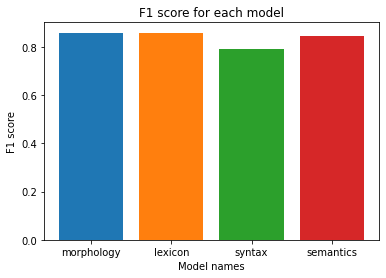

In [ ]:
f1s = [morphologyf1, lexiconf1, syntaxf1, semanticsf1]
model_names = ['morphology',  'lexicon', 'syntax', 'semantics']
for i in range(len(model_names)):
    f1 = f1s[i]
    model_name = model_names[i]
    plt.bar(model_name, f1)
    
plt.xlabel('Model names')
plt.ylabel('F1 score')
plt.title('F1 score for each model')

Text(0.5, 1.0, 'Accuracy score for each model')

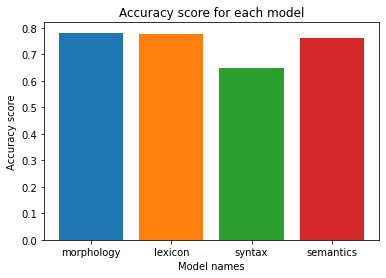

In [ ]:
Accs = [morphologyAccuracy, lexiconAccuracy, syntaxAccuracy, semanticsAccuracy]
model_names = ['morphology',  'lexicon', 'syntax', 'semantics']
for i in range(len(model_names)):
    acc = Accs[i]
    model_name = model_names[i]
    plt.bar(model_name, acc)
    
plt.xlabel('Model names')
plt.ylabel('Accuracy score')
plt.title('Accuracy score for each model')

Text(0.5, 1.0, 'Percision score for each model')

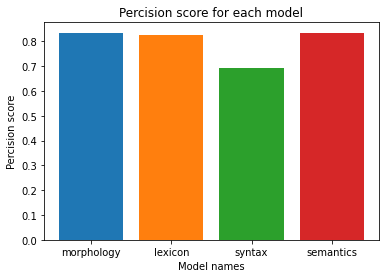

In [ ]:
Pers = [morphologyPercision, lexiconPercision, syntaxPercision, semanticsPercision]
model_names = ['morphology',  'lexicon', 'syntax', 'semantics']
for i in range(len(model_names)):
    per = Pers[i]
    model_name = model_names[i]
    plt.bar(model_name, per)
    
plt.xlabel('Model names')
plt.ylabel('Percision score')
plt.title('Percision score for each model')

Text(0.5, 1.0, 'Recall score for each model')

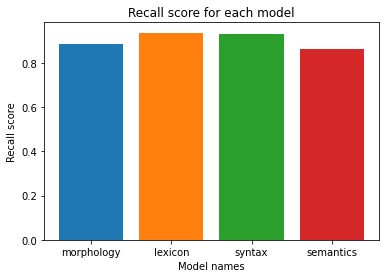

In [ ]:
Recalls = [morphologyRecall, lexiconRecall, syntaxRecall, semanticsRecall]
model_names = ['morphology',  'lexicon', 'syntax', 'semantics']
for i in range(len(model_names)):
    rec = Recalls[i]
    model_name = model_names[i]
    plt.bar(model_name, rec)
    
plt.xlabel('Model names')
plt.ylabel('Recall score')
plt.title('Recall score for each model')

# **References and citations**

Practical 3, which feature is helpful for female name classification. https://www.nltk.org/book/ch06.html

research paper: https://github.com/yoonkim/CNN_sentence

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html 

https://www.nltk.org/book/ch06.html 

Other online resources: 

https://towardsdatascience.com/setting-up-text-preprocessing-pipeline-using-scikit-learn-and-spacy-e09b9b76758f 
 
sentiment analysis scikit learn https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

scikit learn or nltk + NLP techniques https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

scikit learn logistic regression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html